In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
def simulate_particle_motion(q,m,B, initial_position, initial_velocity, dt, num_steps):
    # Initialize arrays
    positions = np.zeros((num_steps, 3))
    velocities = np.zeros((num_steps, 3))

    # Set initial conditions
    positions[0] = initial_position
    velocities[0] = initial_velocity

    # Perform simulation
    for i in range(1, num_steps):
        # Calculate acceleration using Lorentz force equation
        v = velocities[i - 1]
        a = (q / m) * np.cross(v, B)

        # Update velocity and position using Euler's method
        velocities[i] = v + a * dt
        positions[i] = positions[i - 1] + velocities[i] * dt
        
    return positions

In [3]:
# Simulation parameters
charge = 1.6e-19  # Charge of the particle (C)
mass_i = 1.8*1.67e-27  # Mass of the particle (kg)
mass_e = 9.109e-31 # Mass electron
magnetic_field = np.array([0, 1.5, 0])  # Magnetic field (T)
initial_velocity_i = np.array([1e6, 1e6, 0])  # Initial velocity (m/s)
#initial_velocity_e = np.array([1e2, 1e2, 1e4])

velocity_magnitude = np.linalg.norm(initial_velocity_i)
omega_y = (charge * np.linalg.norm(magnetic_field))/mass_i

larmor_radius = velocity_magnitude/omega_y
# Set initial position based on Larmor radius
initial_position = np.array([larmor_radius, larmor_radius, 0])  # Initial position (m)
time_step = 1e-11  # Time step (s)
num_steps = 10500  # Number of steps in the simulation

In [4]:
# Run simulation
positions_i = simulate_particle_motion(charge, mass_i, magnetic_field, initial_position, 
                                     initial_velocity_i, time_step, num_steps)
#positions_e = simulate_particle_motion(-charge, mass_e, magnetic_field, initial_position, 
 #                                    initial_velocity, time_step, num_steps)

In [5]:
positions_i[:, 0]

array([0.01771302, 0.01772302, 0.01773302, ..., 0.02856078, 0.02855573,
       0.02855067])

<IPython.core.display.Javascript object>


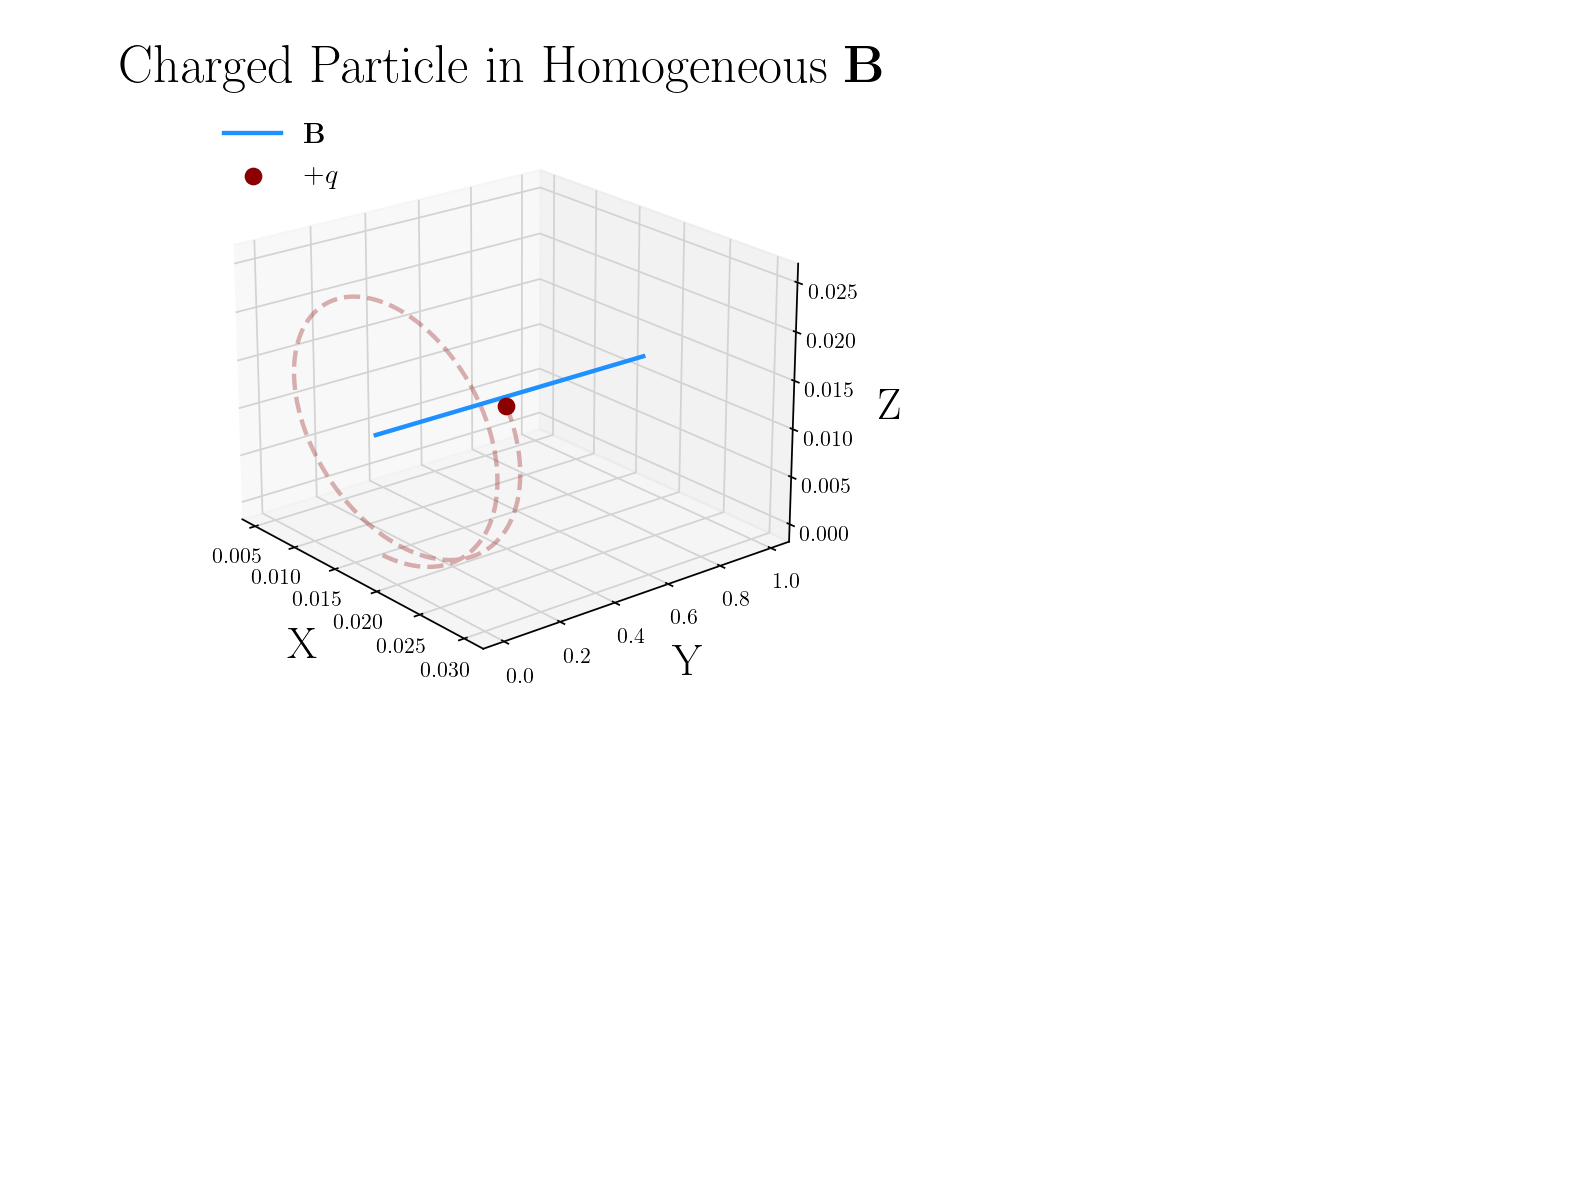

In [13]:
center = np.sqrt(larmor_radius**2+larmor_radius**2)
y_field = np.linspace(0, 1, 100)
x_field = np.linspace(larmor_radius, larmor_radius, 100)
z_field = np.linspace(center/2, center/2, 100)

# Plot results
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(positions_e[:, 0], positions_e[:, 1], positions_e[:, 2],color="blue")
ax.plot(positions_i[:, 0], positions_i[:, 1], positions_i[:, 2],color="darkred"
        ,alpha=0.3,linestyle="--")
ax.plot(x_field, y_field, z_field, 'dodgerblue', label=r'$\textbf{B}$')

last_point = positions_i[-1]
ax.scatter(last_point[0], last_point[1], last_point[2],label=r"+$q$", color='darkred', s=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.set_tick_params(labelsize=10,pad=0.5)
ax.yaxis.set_tick_params(labelsize=10,pad=1)
ax.zaxis.set_tick_params(labelsize=10,pad=1)

ax.set_title(f"Charged Particle in Homogeneous "+ r"$\textbf{B}$")
plt.legend(loc="upper left",prop={'size':13},frameon=False)
plt.show()

In [47]:
plt.savefig(f"Charged_Particle.png",png=600)

/tmp/ipykernel_7444/3032424459.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "png" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"Charged_Particle.png",png=600)


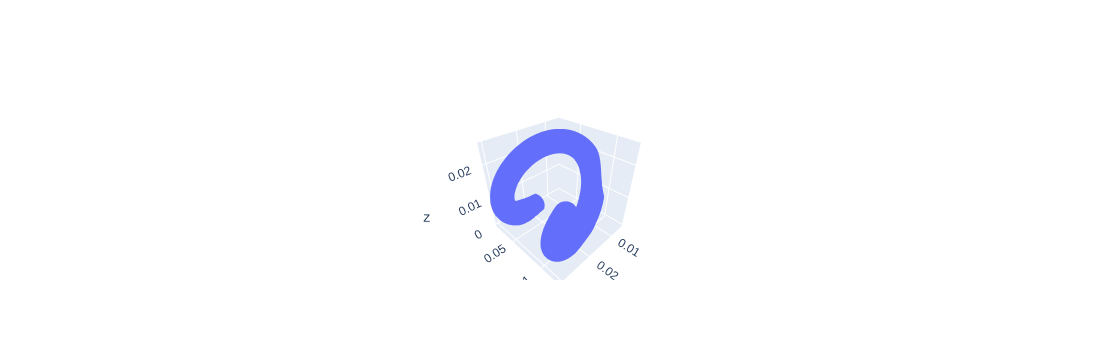

In [14]:
fig = go.Figure(data=[go.Scatter3d(x=positions_i[:, 0], y=positions_i[:, 1], 
                                   z=positions_i[:, 2],mode='markers')])
fig.show()